In [4]:
# Paso 0: Importar librerias necesarias

import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import pylab as plt
from pandas.plotting import lag_plot


In [5]:
# Paso 1: Importar el DF de todas las empresas del IBEX 35

df = pd.read_csv('ibex35.csv')

df.head()

,id,ticker,empresa,date,open,high,low,close,adj close,volume
0,1,ANA,Acciona,2019-01-02,73.900002,73.900002,73.900002,73.900002,64.148270,0
1,1,ANA,Acciona,2022-06-24,174.199997,178.800003,174.000000,178.800003,169.562302,0
2,1,ANA,Acciona,2022-06-23,169.899994,173.199997,169.000000,173.000000,164.061951,0
3,1,ANA,Acciona,2022-06-22,171.399994,171.399994,168.800003,170.199997,161.406616,0
4,1,ANA,Acciona,2022-06-21,179.699997,179.699997,172.300003,173.600006,164.630966,0


In [6]:
# Paso 2: Filtrar por la empresa sobre la que realizar el modelo

fluidra = df[df['empresa'] == 'Fluidra']

fluidra.shape

(1325, 10)

In [7]:
# Paso 3: Seleccionar las columnas definitivas que utilizaremos

fluidra = fluidra [['date','open','high','low','close','adj close']]

fluidra.shape

(1325, 6)

In [8]:
# Paso 4: Modificar el formato de columna 'date' (format: object ===> datatime)

fluidra['date'] = pd.to_datetime(fluidra['date'], format="%Y-%m-%d")

fluidra.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1325 entries, 20550 to 21874
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1325 non-null   datetime64[ns]
 1   open       1325 non-null   float64       
 2   high       1325 non-null   float64       
 3   low        1325 non-null   float64       
 4   close      1325 non-null   float64       
 5   adj close  1325 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 72.5 KB


In [9]:
# Paso 5: Ordenar el DF por fecha

fluidra.sort_values(by='date',ascending= True, inplace=True)

fluidra.head()

,date,open,high,low,close,adj close
21874,2019-01-02,9.47,9.74,9.47,9.60,8.538031
21211,2019-01-03,9.69,9.69,9.35,9.46,8.413518
20985,2019-01-04,9.35,9.62,9.35,9.40,8.360155
20986,2019-01-07,9.47,9.47,9.41,9.47,8.422412
20987,2019-01-08,9.49,9.50,9.38,9.45,8.404624


In [10]:
# Paso 6: Filtrar nuevamente para eliminar efecto COVID del análisis (previo a 2021)

# Filtro:

fecha_inicio = '2021-01-01'
fecha_fin = '2024-03-01'

fluidra = fluidra[(fluidra['date'] >= fecha_inicio) & (fluidra['date'] <= fecha_fin)]

# Comprobar si se ha aplicado correctamente

fluidra.shape

(812, 6)

In [11]:
# Paso 7: Añadir al DF fechas obviadas por mercado de valores español (fin de semana y festivos)

# Rango de fechas desde '2021-01-01' a '2024-03-01'

date_range = pd.date_range(start=fluidra['date'].min(), end=fluidra['date'].max(), freq='D')

# Reindexa el DF con el nuevo rango de fechas

fluidra = fluidra.set_index('date').reindex(date_range).reset_index()

# Volver a modificar el nombre de columna 'date'

fluidra = fluidra.rename(columns={'index': 'date'})


In [12]:
# Paso 8: Comprobar que ha introducido la fechas ausentes en el DF original

fluidra.head(10)

,date,open,high,low,close,adj close
0,2021-01-04,21.000000,21.00,19.820000,20.200001,18.206512
1,2021-01-05,20.200001,20.25,19.840000,20.100000,18.116381
2,2021-01-06,20.150000,20.50,19.940001,20.400000,18.386774
3,2021-01-07,20.500000,20.75,19.879999,19.920000,17.954144
4,2021-01-08,20.049999,20.65,20.049999,20.250000,18.251577
5,2021-01-09,NaN,NaN,NaN,NaN,NaN
6,2021-01-10,NaN,NaN,NaN,NaN,NaN
7,2021-01-11,20.350000,21.00,20.250000,20.700001,18.657167
8,2021-01-12,21.000000,21.00,20.350000,20.350000,18.341705
9,2021-01-13,20.200001,20.75,20.150000,20.700001,18.657167


In [13]:
# Paso 9: Rellenar valores nulos con el anterior valor de la columna(viernes o previo a festivo)

fluidra = fluidra.fillna(method='ffill')

In [14]:
# Paso 10: Comprobar que se han introducido los valores correctamente


fluidra.head(10)

,date,open,high,low,close,adj close
0,2021-01-04,21.000000,21.00,19.820000,20.200001,18.206512
1,2021-01-05,20.200001,20.25,19.840000,20.100000,18.116381
2,2021-01-06,20.150000,20.50,19.940001,20.400000,18.386774
3,2021-01-07,20.500000,20.75,19.879999,19.920000,17.954144
4,2021-01-08,20.049999,20.65,20.049999,20.250000,18.251577
5,2021-01-09,20.049999,20.65,20.049999,20.250000,18.251577
6,2021-01-10,20.049999,20.65,20.049999,20.250000,18.251577
7,2021-01-11,20.350000,21.00,20.250000,20.700001,18.657167
8,2021-01-12,21.000000,21.00,20.350000,20.350000,18.341705
9,2021-01-13,20.200001,20.75,20.150000,20.700001,18.657167


In [15]:
# Paso 11: Establecer columna 'date' como índice para modelo

fluidra = fluidra.set_index('date')

fluidra.head(10)

,open,high,low,close,adj close
date,,,,,
2021-01-04,21.000000,21.00,19.820000,20.200001,18.206512
2021-01-05,20.200001,20.25,19.840000,20.100000,18.116381
2021-01-06,20.150000,20.50,19.940001,20.400000,18.386774
2021-01-07,20.500000,20.75,19.879999,19.920000,17.954144
2021-01-08,20.049999,20.65,20.049999,20.250000,18.251577
2021-01-09,20.049999,20.65,20.049999,20.250000,18.251577
2021-01-10,20.049999,20.65,20.049999,20.250000,18.251577
2021-01-11,20.350000,21.00,20.250000,20.700001,18.657167
2021-01-12,21.000000,21.00,20.350000,20.350000,18.341705


In [16]:
# Paso 12: Establecer siguiente criterio para que el modelo AR funcione

fluidra.index = pd.DatetimeIndex(fluidra.index).to_period('d')

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

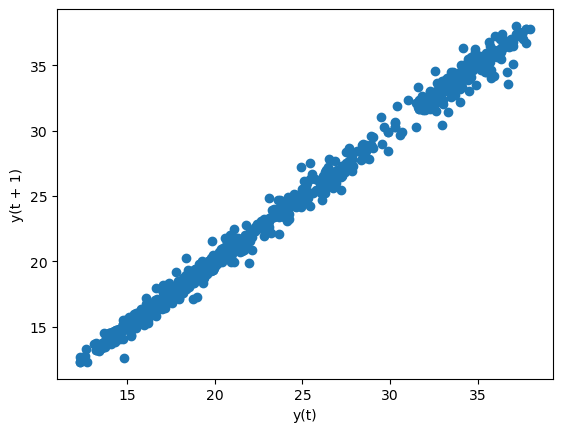

In [17]:
# Paso 13: Comprobar linealidad de la variable y = 'close'

lag_plot(fluidra.close)

In [18]:
# Paso 14: Importar modelo de AR

from statsmodels.tsa.ar_model import AutoReg as AR

In [19]:
# Paso 15: Realizar el split en el DF del train y el test

train, test = fluidra.close[:-10], fluidra.close[-10:]

train.shape, test.shape

((1143,), (10,))

In [20]:
# Paso 16: Entrenar el modelo de AR

modelo = AR(train, lags=1).fit()

In [21]:
# Paso 17: Realizar predicción con el entrenamiento

pred = modelo.predict(len(train), len(fluidra.close)-1)

# Check sobre los valores de la predicción

pred

2024-02-21    21.124621
2024-02-22    21.129230
2024-02-23    21.133828
2024-02-24    21.138417
2024-02-25    21.142995
2024-02-26    21.147562
2024-02-27    21.152119
2024-02-28    21.156666
2024-02-29    21.161203
2024-03-01    21.165729
Freq: D, dtype: float64

In [22]:
# Paso 18: Chequear coincidencia entre test y pred

test

date
2024-02-21    21.139999
2024-02-22    20.920000
2024-02-23    19.969999
2024-02-24    19.969999
2024-02-25    19.969999
2024-02-26    19.809999
2024-02-27    19.719999
2024-02-28    19.850000
2024-02-29    21.559999
2024-03-01    21.620001
Freq: D, Name: close, dtype: float64

In [23]:
# Paso 19: Calcular el error de la predicción sobre la realidad

error = (pred - test).abs().sum()/len(pred)  

error

0.8659269203406026

In [24]:
# Paso 20: Generar un DF sobre la comparativa en realidad, predicción y error

res=pd.DataFrame({'real': test, 'pred': pred, 'error': pred - test})

res

,real,pred,error
2024-02-21,21.139999,21.124621,-0.015378
2024-02-22,20.920000,21.129230,0.209230
2024-02-23,19.969999,21.133828,1.163829
2024-02-24,19.969999,21.138417,1.168418
2024-02-25,19.969999,21.142995,1.172996
2024-02-26,19.809999,21.147562,1.337563
2024-02-27,19.719999,21.152119,1.432120
2024-02-28,19.850000,21.156666,1.306666
2024-02-29,21.559999,21.161203,-0.398796
2024-03-01,21.620001,21.165729,-0.454272
